In [39]:
import pandas as pd
import geopandas as gpd

In [40]:
%%time
data = gpd.read_file('../data/crops/OCUPAC_Pol_MCA_VE2021.zip')

CPU times: user 29.3 s, sys: 94.1 ms, total: 29.4 s
Wall time: 29.4 s


In [41]:
data

,FEATURE,CRECINTO,ETIQUETA,TIPO,CABIDA,CGRUPO,GRUPO,COBERTURAP,MOSAICO1,COBERTURA1,...,NOTA7,NOTAUSO7,NOTA8,NOTAUSO8,HECTAREAS,FECHADATOS,GEOM_AREA,GEOM_PERI,BEGINLIFE,geometry
0,31000021,103160.0,r3V,3-5 riegos/año,0,4,Cultivos leñosos regadío,Viña,Viña(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,3.34,2021,33398.54,1542.38,01/11/2021,"POLYGON ((603173.340 4657368.797, 603177.582 4..."
1,31000021,103176.0,V,Secano,0,3,Cultivos leñosos secano,Viña,Viña(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,4.29,2021,42921.34,837.05,01/11/2021,"POLYGON ((565498.708 4713124.726, 565306.194 4..."
2,31000021,103181.0,V,Secano,0,3,Cultivos leñosos secano,Viña,Viña(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,1.72,2021,17235.23,810.36,01/11/2021,"POLYGON ((567039.350 4710192.941, 567028.467 4..."
3,31000021,103188.0,V,Secano,0,3,Cultivos leñosos secano,Viña,Viña(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,7.42,2021,74154.91,1296.48,01/11/2021,"POLYGON ((571046.440 4714117.783, 571043.810 4..."
4,31000021,103191.0,RV,R. sin limites,0,4,Cultivos leñosos regadío,Viña,Viña(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,2.40,2021,24008.78,618.90,01/11/2021,"POLYGON ((559628.489 4700691.314, 559635.874 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65763,31000021,107130.0,Ph>lz60 !,Secano,60,6,Coníferas,Pino carrasco (Pinus halepensis),Pino carrasco en estado latizal (100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,1.14,2021,11444.08,438.06,01/11/2021,"POLYGON ((621834.812 4692834.571, 621822.112 4..."
65764,31000021,107145.0,Mm<75+Mc<25,Secano,0,5,Forestal no arbolado,MATORRAL MEDITERRÁNEO,Matorral mediterráneo(100%),% en el mosaico: 75,...,NaN,NaN,NaN,NaN,1.59,2021,15932.20,930.78,01/11/2021,"POLYGON ((561163.940 4705127.166, 561165.591 4..."
65765,31000021,107147.0,r2Ch,1-2 riegos/año,0,2,Cultivos herbáceos regadío,CULTIVOS HERBÁCEOS,Cultivos herbáceos(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,0.48,2021,4835.76,394.01,01/11/2021,"POLYGON ((561489.736 4705297.705, 561485.579 4..."
65766,31000021,107152.0,Mm,Secano,0,5,Forestal no arbolado,MATORRAL MEDITERRÁNEO,Matorral mediterráneo(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,1.27,2021,12726.07,853.79,01/11/2021,"POLYGON ((584745.823 4697795.265, 584742.897 4..."


In [42]:
len(data)

65768

<Axes: >

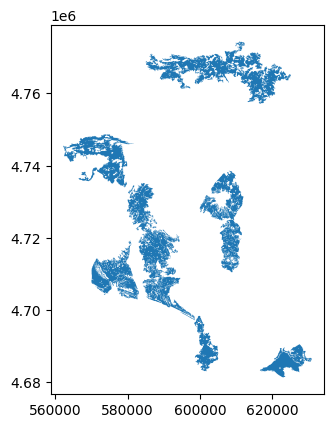

In [43]:
data.sort_values('HECTAREAS', ascending=False).head(10).plot()

<Axes: >

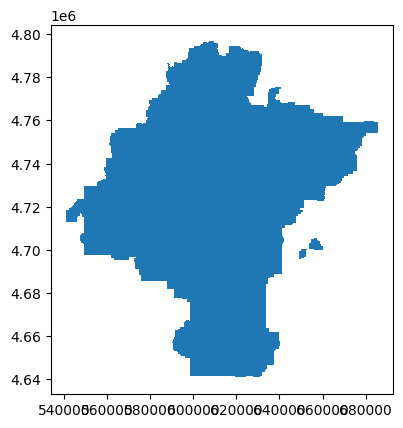

In [6]:
data.envelope.plot()

In [44]:
bounds = data.envelope

In [45]:
data.envelope[0].wkt

'POLYGON ((603173.3402000004 4657096.103499999, 603502.7857999997 4657096.103499999, 603502.7857999997 4657451.963300001, 603173.3402000004 4657451.963300001, 603173.3402000004 4657096.103499999))'

In [46]:
import folium

In [47]:
data.envelope[0].wkt

'POLYGON ((603173.3402000004 4657096.103499999, 603502.7857999997 4657096.103499999, 603502.7857999997 4657451.963300001, 603173.3402000004 4657451.963300001, 603173.3402000004 4657096.103499999))'

In [48]:
bounds[0].centroid.x

603338.0630000001

In [49]:
bounds[0].centroid.y

4657274.0334

In [50]:
bounds.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [51]:
datos = data.to_crs('EPSG:4326')

In [52]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326")
transformer.transform(-11705274.6374,4826473.6922)

(39.72785727727917, -105.15027111593008)

In [53]:
bounds = datos.geometry.unary_union

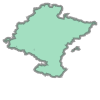

In [56]:
bounds

In [18]:
center = (bounds.centroid.y, bounds.centroid.x)

In [19]:
m = folium.Map(
    location=center,
    tiles='cartodbpositron',
    zoom_start=9
    )

folium.GeoJson(bounds).add_to(m)

m

In [63]:
from pystac_client import Client

URL = 'https://earth-search.aws.element84.com/v0/'
client = Client.open(URL)

search = client.search(
    collections = "sentinel-s2-l2a-cogs",
    intersects = bounds,
    datetime = '2022-07-01/2022-07-02'
)

In [64]:
import stackstac

ds = stackstac.stack(search.get_all_items() ,  epsg=4326, assets=["B04", "B03", "B05"] )

/home/alabarga/BSC/code/environments/siglibre/lib/python3.10/site-packages/stackstac/prepare.py:363: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [65]:
ds

<xarray.DataArray 'stackstac-eb8dbb581cf477a14c114bee42baf9f6' (time: 6,
                                                                band: 3,
                                                                y: 31291,
                                                                x: 21601)>
dask.array<fetch_raster_window, shape=(6, 3, 31291, 21601), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/28)
  * time                          (time) datetime64[ns] 2022-07-02T11:09:15 ....
    id                            (time) <U24 'S2A_30TXP_20220702_0_L2A' ... ...
  * band                          (band) <U3 'B04' 'B03' 'B05'
  * x                             (x) float64 -3.0 -3.0 -3.0 ... -0.3736 -0.3735
  * y                             (y) float64 44.25 44.25 44.25 ... 41.44 41.44
    platform                      <U11 'sentinel-2a'
    ...                            ...
    constellation                 <U10 'sentinel-2'
    title                         (band) <U14 'Band 4 (red)' ... 'Band 5'
    common_name                   (band) object 'red' 'green' None
    center_wavelength             (band) float64 0.6645 0.56 0.7039
    full_width_half_max           (band) float64 0.038 0.045 0.019
    epsg                          int64 4326
Attributes:
    spec:           RasterSpec(epsg=4326, bounds=(-3.000318858269231, 41.4362...
    crs:            epsg:4326
    transform:      | 0.00, 0.00,-3.00|\n| 0.00,-0.00, 44.25|\n| 0.00, 0.00, ...
    resolution_xy:  (0.00012161318382997166, 9.003129490281481e-05)

In [ ]:
import pyproj
import pystac_client
import stackstac
import xarray as xr
from shapely.geometry import box
from shapely.ops import transform

# STAC connection information for Sentinel 2 COGs
STAC_URL = "https://earth-search.aws.element84.com/v0"
STAC_COLLECTION = "sentinel-s2-l2a-cogs"

# spatial projection information
CRS_STRING = "epsg:5070"
EPSG = pyproj.CRS.from_string(CRS_STRING).to_epsg()

# area of interest along the North Shore of Lake Superior
AOI = box(373926, 2744693, 406338, 2765304)

# a few more parameters
RESOLUTION = 100  # meters
BANDS = ["B04", "B03", "B02"]
START_DATE = "2022-09-01"
END_DATE = "2022-09-30"

In [ ]:
# STAC items store bounding box info in epsg:4326
transformer_4326 = pyproj.Transformer.from_crs(
    crs_from=CRS_STRING,
    crs_to="epsg:4326",
    always_xy=True,
)

bbox_4326 = transform(transformer_4326.transform, AOI).bounds

In [21]:
region = gpd.read_file('../data/geo/sanguesa.geojson')

In [22]:
from shapely.geometry import box



In [23]:
region.total_bounds

array([-1.32840168, 42.55714694, -1.2395126 , 42.59396631])

In [24]:
bbox = box(*region.total_bounds)

## rasterstats

In [57]:
data.total_bounds

array([ 541085.5548, 4640788.7971,  685574.0534, 4796617.1772])

In [58]:
data.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [59]:
from rasterstats import zonal_stats

In [60]:
data = data.to_crs("epsg:4326")

In [61]:
data.total_bounds

array([-2.49908978, 41.9095663 , -0.72615784, 43.31464159])

In [62]:
data_sel = gpd.clip(data, mask=bbox)

In [63]:
len(data_sel)

285

In [64]:
data_sel

,FEATURE,CRECINTO,ETIQUETA,TIPO,CABIDA,CGRUPO,GRUPO,COBERTURAP,MOSAICO1,COBERTURA1,...,NOTA7,NOTAUSO7,NOTA8,NOTAUSO8,HECTAREAS,FECHADATOS,GEOM_AREA,GEOM_PERI,BEGINLIFE,geometry
48243,31000021,37943.0,Acu,Secano,0,9,Improductivo,CURSOS DE AGUA,CURSOS DE AGUA(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,395.48,2021,3954751.24,152853.70,01/11/2021,"POLYGON ((-1.28641 42.56263, -1.28649 42.56255..."
61260,31000021,98086.0,ROl,R. sin limites,0,4,Cultivos leñosos regadío,Olivo,Olivo(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,3.75,2021,37520.34,861.01,01/11/2021,"POLYGON ((-1.26389 42.55718, -1.26370 42.55727..."
39291,31000021,40488.0,RCh,R. sin limites,0,2,Cultivos herbáceos regadío,Cultivos herbáceos,Cultivos herbáceos(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,118.92,2021,1189166.96,8493.31,01/11/2021,"POLYGON ((-1.25937 42.55733, -1.25916 42.55745..."
36246,31000021,40247.0,PM(Mm<70/P<30) !,Secano,0,5,Forestal no arbolado,PASTIZAL MATORRAL,Matorral mediterráneo(70%) y Pastizal(30%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,18.07,2021,180697.37,7530.55,01/11/2021,"POLYGON ((-1.25781 42.55738, -1.25773 42.55716..."
30428,31000021,39977.0,OF(Po<60/Fa<40)>60 !,Secano,60,7,Frondosas,OTRAS MEZCLAS DE FRONDOSAS,Chopo y álamo (60%) y Fresno de hoja estrecha ...,% en el mosaico: 100,...,NaN,NaN,NaN,NaN,29.06,2021,290638.14,15342.52,01/11/2021,"POLYGON ((-1.27764 42.56228, -1.27746 42.56233..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32812,31000021,36736.0,OF(Po<55/Fa<35/Sa<10)>70 !,Secano,70,7,Frondosas,OTRAS MEZCLAS DE FRONDOSAS,Chopo y álamo (55%) y Fresno de hoja estrecha ...,% en el mosaico: 100,...,NaN,NaN,NaN,NaN,6.74,2021,67416.29,3851.42,01/11/2021,"POLYGON ((-1.27159 42.59393, -1.27164 42.59386..."
33367,31000021,36370.0,(Mco<70/Mm<20/Mbs<10) !,Secano,0,5,Forestal no arbolado,Coscojar (Quercus coccifera),Coscojar (70%) y Matorral mediterráneo(20%) y ...,% en el mosaico: 100,...,NaN,NaN,NaN,NaN,41.80,2021,417972.28,12353.66,01/11/2021,"POLYGON ((-1.28714 42.59384, -1.28707 42.59380..."
29028,31000021,37035.0,Ch !,Secano,0,1,Cultivos herbáceos secano,Cultivos herbáceos,Cultivos herbáceos(100%),% en el mosaico: 100,...,NaN,NaN,NaN,NaN,560.93,2021,5609344.72,63375.03,01/11/2021,"MULTIPOLYGON (((-1.29221 42.59363, -1.29252 42..."
39834,31000021,33592.0,Acu<70+OF(Fa<40/Po<40/Sa<20)<20>80+Cp<10>f80 !,Secano,0,9,Improductivo,CURSOS DE AGUA,CURSOS DE AGUA(100%),% en el mosaico: 70,...,NaN,NaN,NaN,NaN,118.15,2021,1181523.24,47305.64,01/11/2021,"POLYGON ((-1.26622 42.59377, -1.26614 42.59315..."


In [65]:
import rasterio

In [66]:
help(zonal_stats)

Help on function zonal_stats in module rasterstats.main:

zonal_stats(*args, **kwargs)
    The primary zonal statistics entry point.
    
    All arguments are passed directly to ``gen_zonal_stats``.
    See its docstring for details.
    
    The only difference is that ``zonal_stats`` will
    return a list rather than a generator.



In [67]:
data_sel.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
with rasterio.open("ndvi_test.tiff") as src:
    affine = src.transform
    array = src.read(1)
    print(src.crs)
    df_zonal_stats = pd.DataFrame(zonal_stats(data_sel.to_crs(src.crs), array, affine=affine))

None


ValueError: Must pass either crs or epsg.

In [107]:
df_zonal_stats

,count,min,max,mean
0,0,None,None,None
1,0,None,None,None
2,0,None,None,None
3,0,None,None,None
4,0,None,None,None
...,...,...,...,...
280,0,None,None,None
281,0,None,None,None
282,0,None,None,None
283,0,None,None,None


In [ ]:
# adding statistics back to original GeoDataFrame
gdf2 = pd.concat([gdf, df_zonal_stats], axis=1) 